### 2nd European Conference on Social Networks, June 14-17, 2016, Paris (http://eusn2016.sciencesconf.org/)
## Workshop 12:
# EXTRACTING SOCIAL NETWORKS FROM LITERARY TEXT
# III. Comparing Networds of Common Noun Phrases in Two Texts
## By Moses Boudourides (<mailto:Moses.Boudourides@gmail.com>) and Sergios Lenis (<mailto:sergioslenis@gmail.com>) 
## University of Patras, Greece

**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from [https://github.com/mboudour/WordNets/blob/master/EUSN2016_LiteraryTextNetworksWorkshop](https://github.com/mboudour/WordNets/blob/master/EUSN2016_LiteraryTextNetworksWorkshop)
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

<p>
**Table of Contents**

[I. Importing the Text & Detecting Common Noun Phrases](#I)

[II. The Networks of Common Noun Phrases](#II)

## Importing Python modules

In [1]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import imp
import seaborn as sns       # pip install seaborn
sns.set_style("white")      # For seaborn to show axes in iPython Notebook
from lightning import Lightning
from numpy import random, asarray, sqrt, arctan2, pi, clip
from seaborn import color_palette
from sklearn import datasets
from colorsys import hsv_to_rgb
import itertools
from nltk.tokenize import sent_tokenize, word_tokenize

# utilsdir='/Users/mosesboudourides/Dropbox/Python Projects/EUSN2016_LiteraryTextNetworksWorkshop/utils/'
# utilsdir='/home/mab/Dropbox/Python Projects/utils/'#tools.py'
utilsdir='/home/mab/Dropbox/Python Projects/EUSN2016_LiteraryTextNetworksWorkshop/utils/'
# utilsdir='/home/sergios-len/Dropbox/Python Projects (1)/EUSN2016_LiteraryTextNetworksWorkshop/utils/'

%matplotlib inline 
%load_ext autoreload

/home/mab/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# The case of Clinton-Saunder's 2015 Campaign Launch Speeches

<a id='I'></a>
## I. Importing the Text & Detecting Common Noun Phrases

In [2]:
# The transcript of Hillary Clinton’s Campaign Launch Speech on 6-12-2015 was downloaded from 
# http://time.com/3920332/transcript-full-text-hillary-clinton-campaign-launch/ (accessed on 3-19-2016)
# The transcript of Bernie Sanders' Campaign Launch Speech on 5-26-2015 was downloaded from 
# https://berniesanders.com/bernies-announcement/ (accessed on 3-19-2016)

filenameA = 'texts/HillaryClintonCampaignLaunch6-12-2015.txt'
filenameB = 'texts/BernieSandersCampaignLaunch5-26-2015.txt'
titlenameA = "Hillary Clinton's Campaign Launch Speech, 6-12-2015"
titlenameB = "Bernie Sanders' Campaign Launch Speech, 5-26-2015"
ttA = "Hillary Clinton's speech"
ttB = "Bernie Sanders' speech"
nnA = "Hillary Clinton's noun phrases"
nnB = "Bernie Sanders' noun phrases"
wwA = "Hillary Clinton's Network of Common Noun Phrases"
wwB = "Bernie Sanders' Network of Common Noun Phrases"

fA = codecs.open(filenameA, "r", encoding="utf-8").read()
fB = codecs.open(filenameB, "r", encoding="utf-8").read()

### *Noun phrases* are words or groups of words containing a noun and functioning in a sentence as subject, object, or prepositional object.

In [3]:
num_linesA = 0
num_wordsA = 0
num_charsA = 0
for line in fA:
    words = line.split()
    num_linesA += 1
    num_wordsA += len(words)
    num_charsA += len(line)
print "%s, has number of words = %i and number of characters = %i" %(titlenameA,num_wordsA,num_charsA)
num_linesB = 0
num_wordsB = 0
num_charsB = 0
for line in fB:
    words = line.split()
    num_linesB += 1
    num_wordsB += len(words)
    num_charsB += len(line)
print "%s, has number of words = %i and number of characters = %i" %(titlenameB,num_wordsB,num_charsB)

blobA = TextBlob(fA)
blobB = TextBlob(fB)

npA = blobA.np_counts
npB = blobB.np_counts

Hillary Clinton's Campaign Launch Speech, 6-12-2015, has number of words = 22259 and number of characters = 27000
Bernie Sanders' Campaign Launch Speech, 5-26-2015, has number of words = 16138 and number of characters = 19619


In [4]:
dfnp1 = pd.DataFrame(columns=[nnA, "Frequencies"])
dfnp2 = pd.DataFrame(columns=[nnB, "Frequencies"])

u=1
for l in npA: 
    dfnp1.loc[u]=[l,npA[l]]
    u+=1
u=1
for l in npB: 
    dfnp2.loc[u]=[l,npB[l]]                  
    u+=1

print "The total number of noun phrases in %s is %i" %(ttA,len(npA))
cdfnp1 = dfnp1.drop(dfnp1.index[[63]])
sdfnp1 = cdfnp1.sort_values(by=['Frequencies'], ascending=False)
sdfnp1.head(10)

The total number of noun phrases in Hillary Clinton's speech is 293


,Hillary Clinton's noun phrases,Frequencies
272,america,30.0
270,family issue,6.0
237,health care,5.0
282,well,4.0
142,hard work,4.0
263,congress,4.0
88,roosevelt,3.0
204,obama,3.0
61,good news,2.0
241,basic bargain,2.0


In [5]:
print "The total number of noun phrases in %s is %i" %(ttB,len(npB))
cdfnp2 = dfnp2.drop(dfnp2.index[[226]])
sdfnp2 = cdfnp2.sort_values(by=['Frequencies'], ascending=False)
sdfnp2.head(10)

The total number of noun phrases in Bernie Sanders' speech is 268


,Bernie Sanders' noun phrases,Frequencies
245,america,9.0
200,health care,4.0
201,american democracy,4.0
45,republican,4.0
250,vermont,3.0
88,jobs,3.0
8,major country,3.0
203,young people,2.0
104,care,2.0
241,koch,2.0


In [6]:
common={}
ncommon={}
dfc=pd.DataFrame(columns=["Common noun phrases", ttA, ttB])
u=1
for l in npA:  
    if l in npB:
        common[l]=min(npA[l],npB[l])
        ncommon[l]=(npA[l],npB[l])        
        dfc.loc[u]=[l,npA[l],npB[l]]
        u+=1
dfc = dfc.sort_values(by=[ttA], ascending=False)
dfc

,Common noun phrases,Hillary Clinton's speech,Bernie Sanders' speech
22,america,30.0,9.0
19,health care,5.0,4.0
23,well,4.0,1.0
21,congress,4.0,1.0
9,york,2.0,2.0
20,young people,2.0,2.0
18,middle class,2.0,2.0
13,constitutional amendment,2.0,1.0
1,thank,2.0,1.0
3,republican,2.0,4.0


In [7]:
cdfc = dfc.drop(dfc.index[[2,4,8]])
# cdfc = cdfc.sort_values(by=[ttA], ascending=False)
cdfc

,Common noun phrases,Hillary Clinton's speech,Bernie Sanders' speech
22,america,30.0,9.0
19,health care,5.0,4.0
21,congress,4.0,1.0
20,young people,2.0,2.0
18,middle class,2.0,2.0
13,constitutional amendment,2.0,1.0
3,republican,2.0,4.0
10,american people,1.0,2.0
11,high school,1.0,1.0
2,political process,1.0,1.0


In [8]:
# to_be_removed = [u'well',u'thank',u'york']
# for key in common.keys():
#     if key in to_be_removed:
#         del common[key]
# ccommon=common.keys()
# print ccommon

ccommon=cdfc['Common noun phrases'].tolist()

<a id='II'></a>
## II. The Networks of Common Noun Phrases

In [9]:
def occurrences(source,terms):
    ALL_sentences=sent_tokenize(source)
    combinations_terms = list(itertools.combinations(terms,2))
    n = len(combinations_terms)
#     print n,combinations_terms[0]
#     print ALL_sentences[0]
#     print ALL_sentences[1]
    occurlist =[]
    for i in range(n):
        for j in ALL_sentences:
            temp= list(combinations_terms[i])
            
            out  = re.compile(str(temp[0])+'(.*?)'+str(temp[1]), re.DOTALL |  re.IGNORECASE).findall(j)
            if out :
                occurlist.append(tuple(temp))
            out2  = re.compile(str(temp[1])+'(.*?)'+str(temp[0]), re.DOTALL |  re.IGNORECASE).findall(j)
            if out2 :
                occurlist.append(tuple(temp))
    occurdict={}
    for i in occurlist:
        if i not in occurdict:
            occurdict[i] = 1
        else:
            occurdict[i] = occurdict[i]+1
    return occurdict

HCdict = occurrences(fA,ccommon)
BSdict = occurrences(fB,ccommon)

def makegraph(occurrences):
    G = nx.Graph()
    for ed,wei in occurrences.items():    
        G.add_edge(ed[0],ed[1],weight=wei)
        G.add_node(ed[0],label=ed[0])
        G.add_node(ed[1],label=ed[1])
    return G

GHC = makegraph(HCdict)
GBS = makegraph(BSdict)

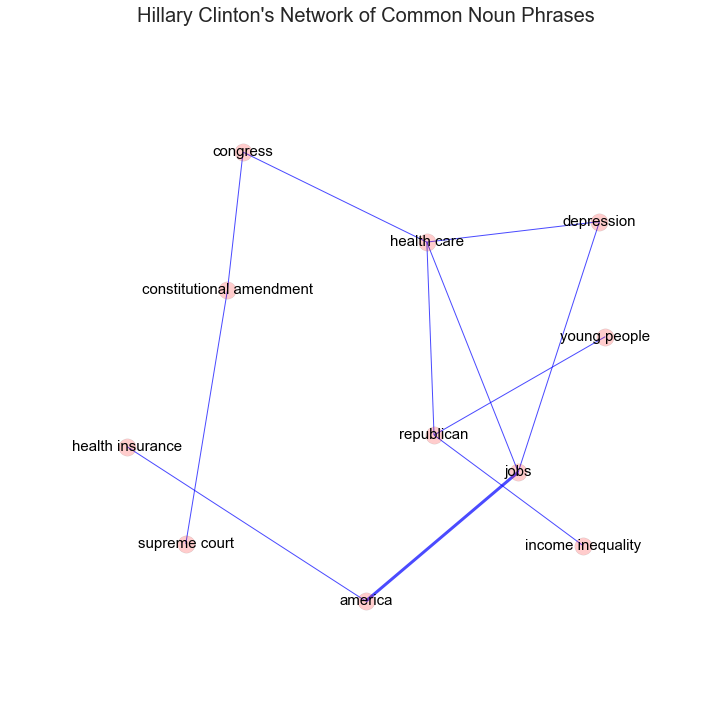

In [10]:
%autoreload 2
tool= imp.load_source('tools', utilsdir+'tools.py')

posHC=nx.spring_layout(GHC,scale=50,k=0.4,iterations=20)
# posHC=nx.graphviz_layout(GHC)
sstt=wwA
posit=tool.draw_network(GHC,sstt,pos=posHC,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15)

### Centralities of Nodes

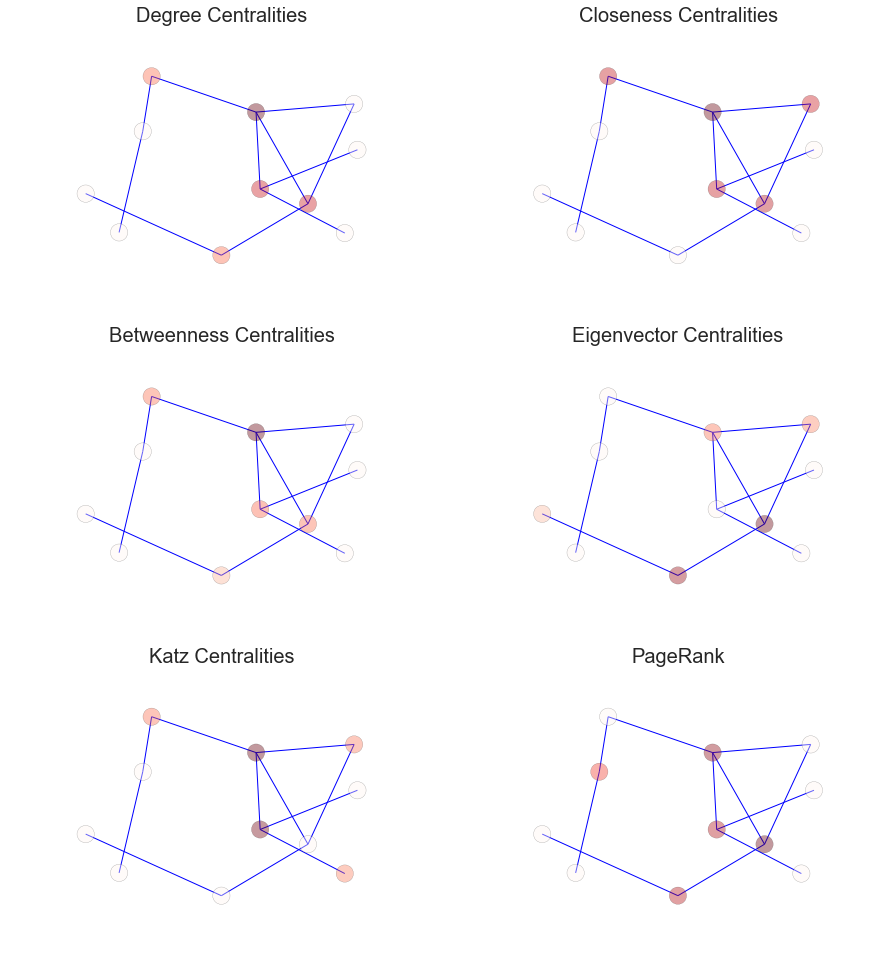

In [11]:
from tools import draw_centralities_subplots

centrali=draw_centralities_subplots(GHC,pos=posHC,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

In [12]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc

,Nodes,closeness_centrality,katz_centrality,betweenness_centrality,page_rank,eigenvector_centrality,degree_centrality
0,america,0.344828,-0.223866,0.200000,0.050306,0.268990,0.2
1,jobs,0.454545,0.003193,0.355556,0.154790,0.164756,0.3
2,congress,0.434783,0.274432,0.355556,0.084613,0.028507,0.2
3,health insurance,0.263158,-0.227488,0.000000,0.095794,0.655743,0.1
4,constitutional amendment,0.333333,0.031633,0.200000,0.054349,0.028507,0.2
5,supreme court,0.256410,-0.072136,0.000000,0.127133,0.094624,0.1
6,income inequality,0.312500,0.244827,0.000000,0.040652,0.102548,0.1
7,health care,0.555556,0.569982,0.733333,0.050306,0.592673,0.4
8,young people,0.312500,0.244827,0.000000,0.142423,0.311879,0.1
9,republican,0.434783,0.552924,0.377778,0.129419,0.028507,0.3


### Communities of Nodes 

Number of communities of Hillary Clinton's Network of Common Noun Phrases = 4
Community partition of Hillary Clinton's Network of Common Noun Phrases:
[[u'republican', u'income inequality', u'young people'], [u'jobs', u'health insurance', u'america'], [u'congress', u'constitutional amendment', u'supreme court'], [u'depression', u'health care']]
Community modularity of Hillary Clinton's Network of Common Noun Phrases = 0.4172


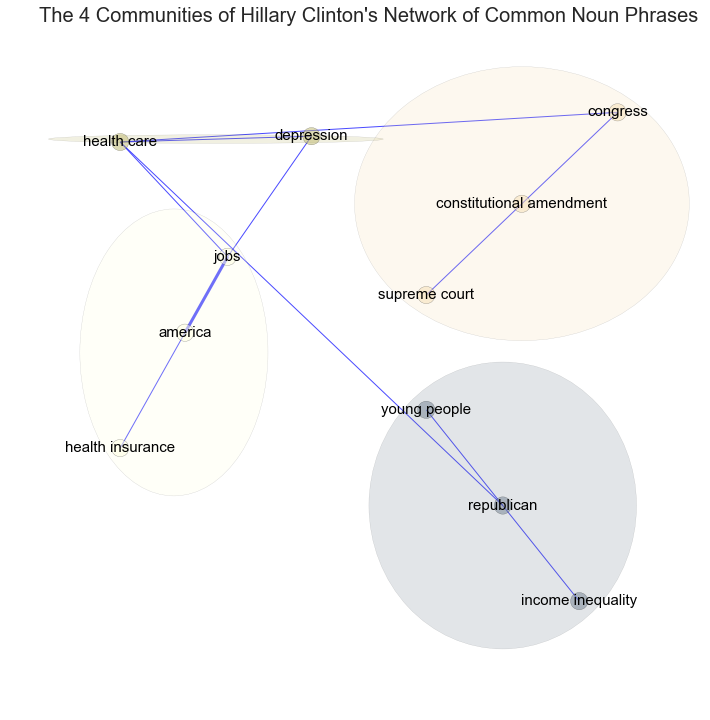

In [13]:
%autoreload 2
from tools import draw_comms, modul_arity, print_communities

part,nodper=print_communities(GHC,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.7
vcc={}
sstta="The %s Communities of %s" %(max(part.values())+1,sstt)

draw_comms(GHC,GHC.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=15,valpha=0.5)

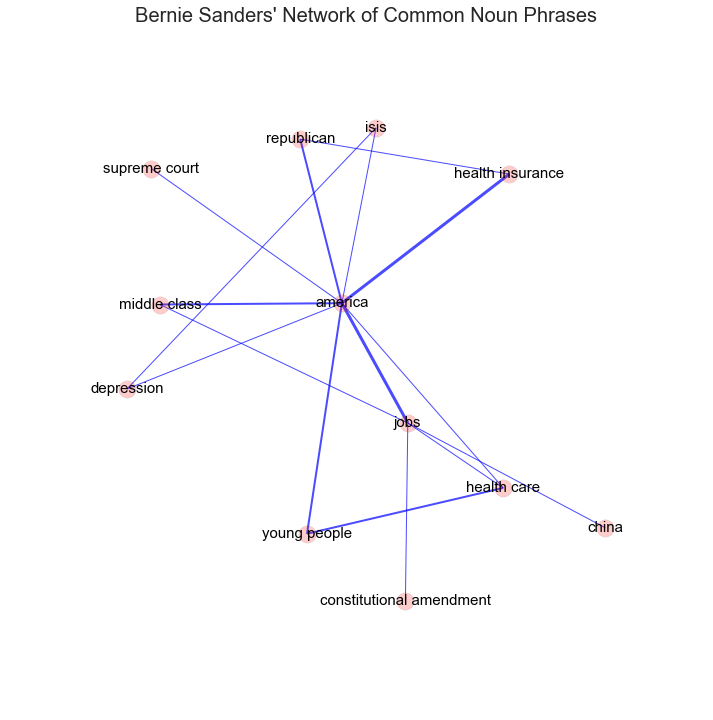

In [14]:
posBS=nx.spring_layout(GBS,scale=50,k=0.4,iterations=20)
# posBS=nx.graphviz_layout(GHC)
sstt=wwB
posit=tool.draw_network(GBS,sstt,pos=posBS,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15)

### Centralities of Nodes

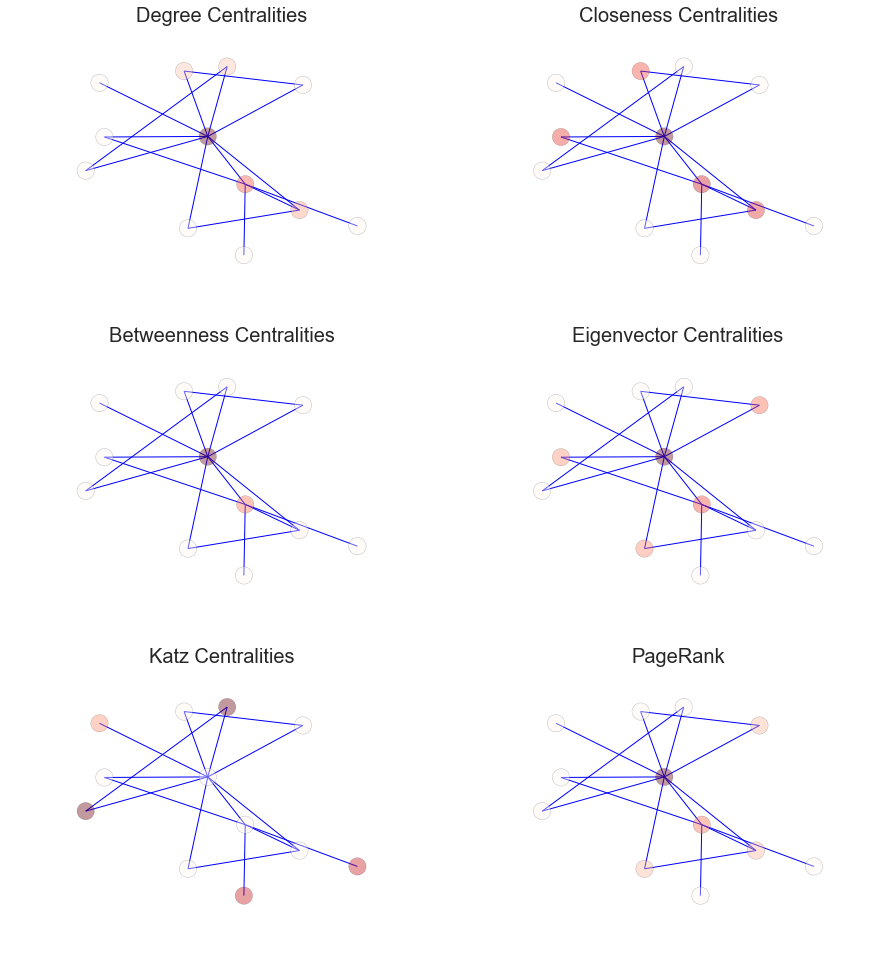

In [15]:
centrali=draw_centralities_subplots(GBS,pos=posBS,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

In [16]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc

,Nodes,closeness_centrality,katz_centrality,betweenness_centrality,page_rank,eigenvector_centrality,degree_centrality
0,republican,0.500000,-0.054908,0.000000,0.303229,0.249555,0.181818
1,isis,0.500000,0.390754,0.000000,0.049755,0.241183,0.181818
2,constitutional amendment,0.407407,0.299025,0.000000,0.030371,0.059416,0.090909
3,supreme court,0.478261,0.153162,0.000000,0.028609,0.117068,0.090909
4,depression,0.500000,0.390754,0.000000,0.078205,0.271790,0.181818
5,health care,0.578947,-0.426844,0.027273,0.030371,0.258035,0.272727
6,china,0.407407,0.299025,0.000000,0.078684,0.391682,0.090909
7,young people,0.500000,-0.492665,0.000000,0.062589,0.059416,0.181818
8,middle class,0.550000,0.045514,0.000000,0.147174,0.654677,0.181818
9,jobs,0.647059,0.031424,0.354545,0.079921,0.335784,0.454545


### Communities of Nodes 

Number of communities of Bernie Sanders' Network of Common Noun Phrases = 4
Community partition of Bernie Sanders' Network of Common Noun Phrases:
[[u'america', u'supreme court', u'health insurance', u'middle class', u'republican'], [u'isis', u'depression'], [u'constitutional amendment', u'china', u'jobs'], [u'young people', u'health care']]
Community modularity of Bernie Sanders' Network of Common Noun Phrases = 0.1970


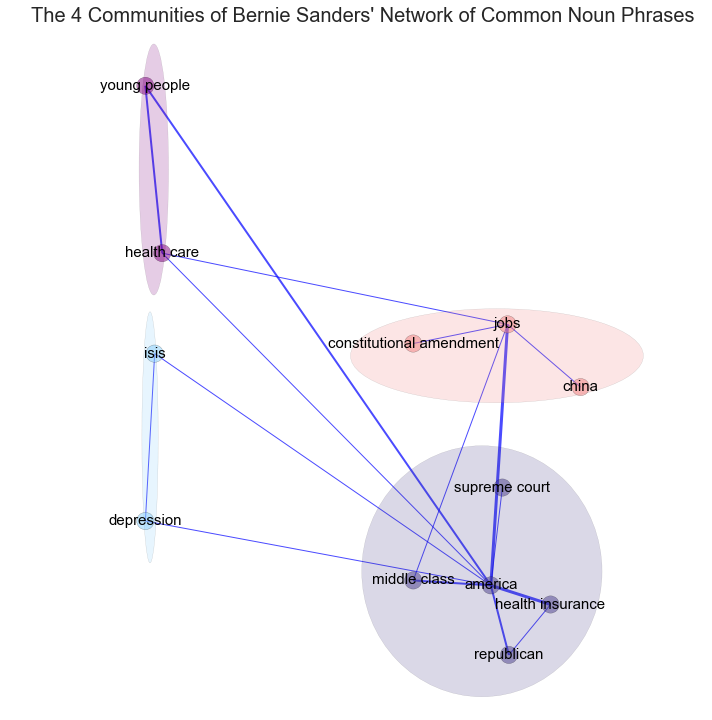

In [17]:
part,nodper=print_communities(GBS,sstt)

# d=0.8 
# dd=0.8
# c=1.2
# cc=1.4
# alpha=0.2
# ealpha=.7
# vcc={}
sstta="The %s Communities of %s" %(max(part.values())+1,sstt)

draw_comms(GBS,GBS.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=15,valpha=0.5)

### Comparing the Two Networks of Common Noun Phrases

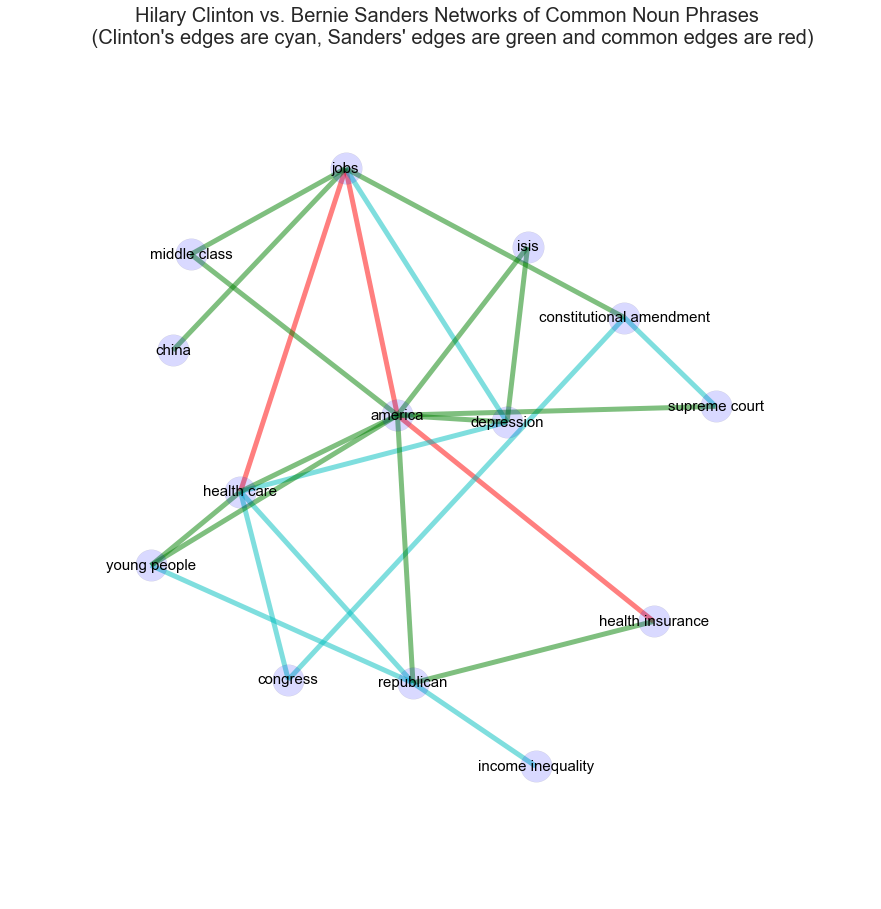

In [18]:
G = nx.Graph()
G.add_edges_from(GHC.edges())
G.add_edges_from(GBS.edges())

pos=nx.spring_layout(G,scale=50,k=0.4,iterations=20)
# pos=nx.graphviz_layout(G)
sstt="Hilary Clinton vs. Bernie Sanders Networks of Common Noun Phrases \n (Clinton's edges are cyan, Sanders' edges are green and common edges are red)"
plt.figure(figsize=(15,15))
G1 = GHC.to_directed()
G2 = GBS.to_directed()
X=nx.Graph()
X.add_edges_from(list(set(G1.edges()).intersection(set(G2.edges()))))
HCandBSedges = list(X.edges())
HCedges = [e for e in GHC.edges() if e not in list(set(G1.edges()).intersection(set(G2.edges())))]
BSedges = [e for e in GBS.edges() if e not in list(set(G1.edges()).intersection(set(G2.edges())))]

nx.draw_networkx_nodes(G,pos,withLabels=True,node_color='b',node_size=1000,alpha=0.15)
# nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,edgelist=HCandBSedges,width=5,alpha=0.5,edge_color='red')
nx.draw_networkx_edges(G,pos,edgelist=HCedges,width=5,alpha=0.5,edge_color='c')
nx.draw_networkx_edges(G,pos,edgelist=BSedges,width=5,alpha=0.5,edge_color='g')
nx.draw_networkx_labels(G,pos=pos,font_size=15)
plt.title(sstt,fontsize=20)
kk=plt.axis('off')